In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
ameriflux_ds = pd.read_csv('AmeriFlux-site-search-results-202410071335.tsv', sep='\t')

In [3]:
# ameriflux_ds.head()

In [4]:
fluxnet = ameriflux_ds.loc[ameriflux_ds['AmeriFlux FLUXNET Data'] == 'Yes']
len(fluxnet)

196

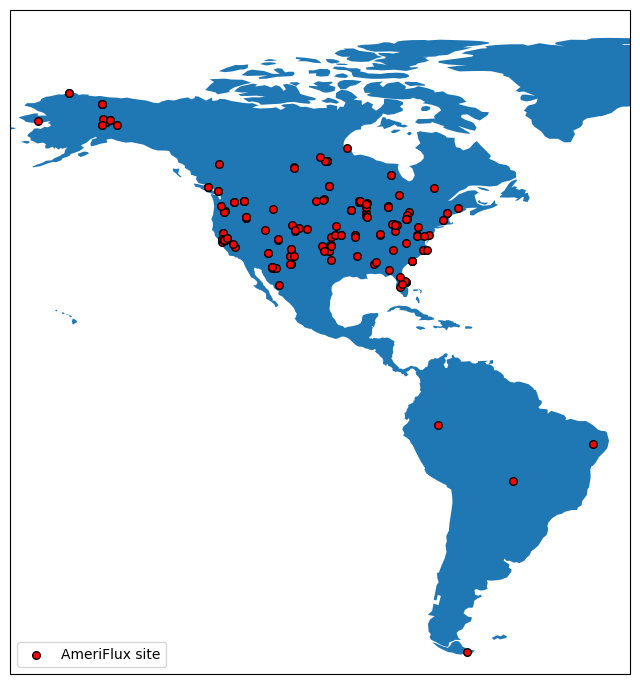

In [42]:
fig, ax = plt.subplots(figsize=(8,10),subplot_kw= {'projection': ccrs.PlateCarree()})
ax.set_extent([-170,-30,-60,90], crs=ccrs.PlateCarree())

# Import land + plot land shapes
shape = '~/.local/share/cartopy/shapefiles/natural_earth/physical/ne_110m_land.shp'
land = gpd.read_file(shape)
land.plot(ax=ax,figsize=(10, 6))


# Plot Flux sites based on lat/lon
geometry = [Point(xy) for xy in zip(fluxnet['Longitude (degrees)'], fluxnet['Latitude (degrees)'])]
gdf = GeoDataFrame(fluxnet, geometry=geometry)
gdf.plot(ax=ax, marker='o', color='red', markersize=30, edgecolor='k',label='AmeriFlux site');
ax.legend(loc='lower left')

In [ ]:
# Cartopy shapefiles (download natural earth features to these folders)
# https://www.naturalearthdata.com/downloads/
import cartopy
print(cartopy.config['data_dir'])